### Run the classification on source extracted background

Compared to the star background (used as true detections)

In [1]:
# 
import sys
sys.path.append("../utils/")
from utils_ML import *
from util_event_files import HRCevt1
import numpy as np
from hyperscreen import hypercore, hypercore_csv, hypercore_stowed



/Users/beckynevin/anaconda3/envs/ciao-4.12/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


compiled


In [2]:
# Look at the source versus background events:

# First load them up
file_dir = "/Users/beckynevin/CfA_Code/EVE/data/csv_files/"
obsid_train = '579'

bg_train = pd.read_csv(file_dir+'science_dataframe_cutout_'+str(obsid_train)+'.csv')
source_train = pd.read_csv(file_dir+'science_dataframe_stars_'+str(obsid_train)+'.csv')

# This is the science observation, or the two things above combined
obs = hypercore_csv.HRCevt1(file_dir+'science_dataframe_'+str(obsid_train)+'.csv')

/Users/beckynevin/anaconda3/envs/ciao-4.12/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
print(bg_train)

         Unnamed: 0          time  crsv  crsu  amp_sf    av1     av2    av3  \
0                 0  6.087923e+07  37.0  49.0     1.0   12.0   480.0  408.0   
1                 1  6.087923e+07  21.0  41.0     1.0  116.0   331.0   37.0   
2                 2  6.087923e+07   7.0  44.0     1.0   62.0   488.0  209.0   
3                 3  6.087923e+07  46.0  37.0     1.0   62.0   338.0  285.0   
4                 4  6.087923e+07  44.0  42.0     1.0  116.0   522.0   33.0   
...             ...           ...   ...   ...     ...    ...     ...    ...   
4687841     4834176  6.098367e+07  22.0  51.0     1.0   71.0   624.0  134.0   
4687842     4834177  6.098367e+07  24.0  49.0     1.0  152.0  1592.0  217.0   
4687843     4834178  6.098367e+07  29.0  27.0     1.0    8.0    11.0  242.0   
4687844     4834179  6.098367e+07   8.0  48.0     1.0   22.0   464.0  293.0   
4687845     4834180  6.098367e+07  11.0   3.0     1.0  101.0   540.0  252.0   

           au1     au2  ...  PI exceeding 255  \
0 

In [129]:
def compare_in_parameter_space(param_list, df1, df2):
    print('~~~~~~~~Length of background = ', len(df1))
    print('~~~~~~~~Length of sources = ', len(df2))
    
    # Plot up x and y histograms for each of these as well so what they look like in x and y space
    plot_from_df(df1, 'Background', 'x', 'y')
    plot_from_df(df2, 'Sources', 'x', 'y')
    for j in range(int(len(param_list)/2)):
        xs_1 = df1[param_list[int(2*j)]].values
        ys_1 = df1[param_list[int(2*j+1)]].values
        
        xs_2 = df2[param_list[int(2*j)]].values
        ys_2 = df2[param_list[int(2*j+1)]].values
        
        plt.clf()
        plt.scatter(xs_1, ys_1, label='Background', s=1)
        plt.scatter(xs_2, ys_2, label='Sources', s=1)
        plt.legend()
        plt.xlabel(param_list[int(2*j)])
        plt.ylabel(param_list[int(2*j+1)])
        plt.show()
    

~~~~~~~~Length of background =  4687846
~~~~~~~~Length of sources =  47785


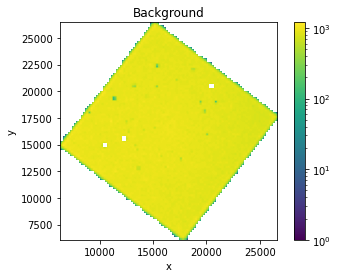

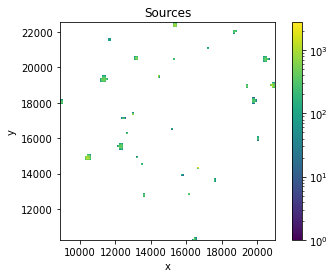

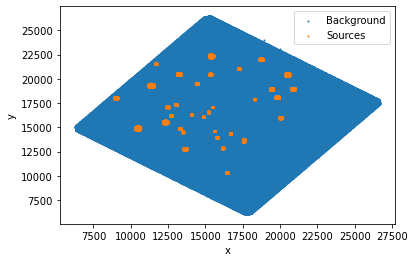

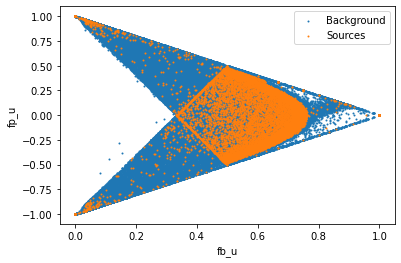

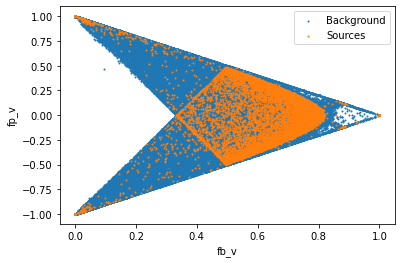

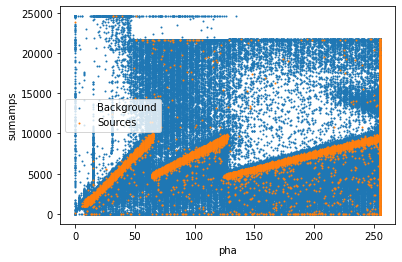

In [130]:
param_list = ['x','y','fb_u', 'fp_u', 'fb_v', 'fp_v', 'pha', 'sumamps']
compare_in_parameter_space(param_list, bg_train, source_train)


In [6]:
# Run a simple random forest:

# First, make class labels
bg_train['class'] = 1
source_train['class'] = 0

# Then combine everything together into one 'X':
X = pd.concat([bg_train, source_train])

# Make a random number column:

random_numbers = np.random.random(size=len(X))

X['random'] = random_numbers

print(X.columns)

Index(['Unnamed: 0', 'time', 'crsv', 'crsu', 'amp_sf', 'av1', 'av2', 'av3',
       'au1', 'au2', 'au3', 'rawx', 'rawy', 'chipx', 'chipy', 'tdetx', 'tdety',
       'detx', 'dety', 'x', 'y', 'pha', 'pi', 'sumamps', 'chip_id', 'fp_u',
       'fb_u', 'fp_v', 'fb_v', 'AV3 corrected for ringing',
       'AU3 corrected for ringing', 'Event impacted by prior event (piled up)',
       'Shifted event time', 'Event telemetered in NIL mode',
       'V axis not triggered', 'U axis not triggered',
       'V axis center blank event', 'U axis center blank event',
       'V axis width exceeded', 'U axis width exceeded', 'Shield PMT active',
       'Upper level discriminator not exceeded',
       'Lower level discriminator not exceeded', 'Event in bad region',
       'Amp total on V or U = 0', 'Incorrect V center', 'Incorrect U center',
       'PHA ratio test failed', 'Sum of 6 taps = 0', 'Grid ratio test failed',
       'ADC sum on V or U = 0', 'PI exceeding 255',
       'Event time tag is out of seque

../utils/utils_ML.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(train_features, train_labels)


[1] 1.0
[1] 0.9987692785970208
[1] 0.9998888796071566
[1] 0.9949582614423619
[1] 1.0
[1] 1.0
[1] 0.9999664778197213
[1] 1.0
[1] 1.0
[1] 1.0


<Figure size 432x288 with 0 Axes>

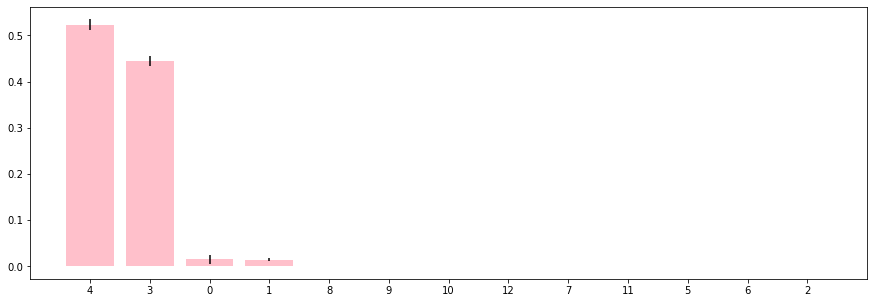

Importance in Order ~~~~
random idx 12
random_value 0.0002537081809878264
4 y
3 x
0 crsv
1 crsu
8 fp_u
9 fb_u
10 fp_v
12 random
7 sumamps
11 fb_v
5 pha
6 pi
2 amp_sf


In [11]:
# Get rid of nans:


# Decide which features you are going to use for the random forest:

feature_list_RFC_no_class = ['crsv','crsu','amp_sf','x','y','pha','pi','sumamps',
                    'fp_u','fb_u','fp_v','fb_v','random']
feature_list_RFC = ['crsv','crsu','amp_sf','x','y','pha','pi','sumamps',
                    'fp_u','fb_u','fp_v','fb_v','random','class']
run_features_RFC = X[feature_list_RFC]
df_RFC = run_features_RFC.dropna()
terms_RFC, reject_terms_RFC, model_RFC = run_RFC(df_RFC, feature_list_RFC_no_class, 'yes')


In [63]:
df_dropna = X[feature_list_RFR].dropna()
ys = df_dropna['class']
Xs = df_dropna[feature_list_RFR_no_class]


acc_random_forest = round(model_RFR.score(Xs, ys) * 100, 2) 
print('Accuracy of the random forest', acc_random_forest)
# So every so slightly beter than normal

Accuracy of the random forest 57.31


In [ ]:
# Might need a conditional random forest if you want to deal with categorical variables
# Apparently another method to use is one hot encoding

In [26]:
# Setting up a neural network:
# create NeuralNetwork class
class NeuralNetwork:

    # intialize variables in class
    def __init__(self, inputs, outputs):
        self.inputs  = inputs
        self.outputs = outputs
        # initialize weights as .50 for simplicity
        self.weights = 0.50*np.ones(np.shape(inputs)[1])
        #np.array([[.50], [.50], [.50]])
        self.error_history = []
        self.epoch_list = []

    #activation function ==> S(x) = 1/1+e^(-x)
    def sigmoid(self, x, deriv=False):
        if deriv == True:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    # data will flow through the neural network.
    def feed_forward(self):
        self.hidden = self.sigmoid(np.dot(self.inputs, self.weights))

    # going backwards through the network to update weights
    def backpropagation(self):
        self.error  = self.outputs - self.hidden
        delta = self.error * self.sigmoid(self.hidden, deriv=True)
        self.weights += np.dot(self.inputs.T, delta)

    # train the neural net for 25,000 iterations
    def train(self, epochs=200):
        for epoch in range(epochs):
            # flow forward and produce an output
            self.feed_forward()
            # go back though the network to make corrections based on the output
            self.backpropagation()    
            # keep track of the error history over each epoch
            self.error_history.append(np.average(np.abs(self.error)))
            self.epoch_list.append(epoch)

    # function to predict output on new and unseen input data                               
    def predict(self, new_input):
        prediction = self.sigmoid(np.dot(new_input, self.weights))
        return prediction


In [69]:
# create neural network

'''
feature_list = ['crsv','crsu','amp_sf','x','y','pha','pi','sumamps',
                    'fp_u','fb_u','fp_v','fb_v']
Xs = np.array(X[feature_list].values)
y = X['class'].values
ys = y.reshape((len(X),1))

'''

'''
print(inputs)
print(outputs)

print(np.shape(inputs), np.shape(outputs))


inputs = np.array([[0, 1, 0],
                   [0, 1, 1],
                   [0, 0, 0],
                   [1, 0, 0],
                   [1, 1, 1],
                   [1, 0, 1]])
# output data
outputs = np.array([[0], [0], [0], [1], [1], [1]])

print(inputs)
print(outputs)

print(np.shape(inputs), np.shape(outputs))

STOP

NN = NeuralNetwork(inputs, outputs)
# train neural network
NN.train()
'''


In [70]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 12)                768       
_________________________________________________________________
dense_23 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 9         
Total params: 881
Trainable params: 881
Non-trainable params: 0
_________________________________________________________________


In [84]:
def balance_classes(df1, df2, ratio):
    # Assign class labels
    df1['class'] = 1 #background
    df2['class'] = 0 #source
    
    len_bg = ratio*len(df2)
    
    df1_sampled = df1.sample(n=len_bg, random_state=1)
    
    
    
    # Now concat them together:
    return  pd.concat([df1_sampled,df2]).dropna()
    
    
    

In [ ]:
## Run a neural network but first balance the classes:
df_dropna = balance_classes(bg_train, source_train,1)
# First, make class labels


#'crsv','crsu','amp_sf','x','y',
feature_list = ['pha','pi','sumamps',
                    'fp_u','fb_u','fp_v','fb_v']

Xs = np.array(df_dropna[feature_list].values)

ys = (df_dropna['class'].values).reshape((len(df_dropna),1))

print(np.shape(Xs), np.shape(ys))

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=np.shape(Xs)[1], activation='relu'))
model.add(Dense(8, activation='relu'))
#model.add(Dense(2, activation='softmax'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


# Okay but we need a validation set plz:
idx = np.random.choice(np.arange(len(Xs)), int(0.2*len(Xs)), replace=False)

import random

def choice(N, percent):
    tmp = np.arange(N)
    random.shuffle(tmp)
    cut = int(N * percent)
    return tmp[:cut], tmp[cut:]

valid_idx, train_idx = choice(len(Xs),0.2)

print('len valid', len(valid_idx), 'len train', len(train_idx))


Xs_train = Xs[train_idx]
ys_train = ys[train_idx]

Xs_valid = Xs[valid_idx]
ys_valid = ys[valid_idx]


# The other option is to shuffle and then use the validation_split keyword:
index_split = np.arange(len(Xs))
random.shuffle(index_split)
Xs_shuffled = Xs[index_split]
ys_shuffled = ys[index_split]

history = model.fit(Xs_shuffled, ys_shuffled, validation_split=0.1, epochs=1000, batch_size=64, verbose=True)

(94899, 7) (94899, 1)
len valid 18979 len train 75920
Train on 85409 samples, validate on 9490 samples
Epoch 1/1000
85409/85409 [==============================] - ETA: 44:34 - loss: 48.4583 - accuracy: 0.45 - ETA: 1:23 - loss: 11.2259 - accuracy: 0.5146 - ETA: 42s - loss: 8.7584 - accuracy: 0.5290  - ETA: 27s - loss: 7.6143 - accuracy: 0.529 - ETA: 20s - loss: 6.7118 - accuracy: 0.521 - ETA: 15s - loss: 5.8820 - accuracy: 0.518 - ETA: 13s - loss: 5.1981 - accuracy: 0.515 - ETA: 11s - loss: 4.6498 - accuracy: 0.513 - ETA: 9s - loss: 4.2521 - accuracy: 0.512 - ETA: 8s - loss: 3.9672 - accuracy: 0.51 - ETA: 7s - loss: 3.8016 - accuracy: 0.51 - ETA: 6s - loss: 3.5446 - accuracy: 0.51 - ETA: 5s - loss: 3.3504 - accuracy: 0.51 - ETA: 5s - loss: 3.1655 - accuracy: 0.51 - ETA: 4s - loss: 3.0119 - accuracy: 0.51 - ETA: 4s - loss: 2.8643 - accuracy: 0.51 - ETA: 4s - loss: 2.8088 - accuracy: 0.51 - ETA: 3s - loss: 2.7029 - accuracy: 0.51 - ETA: 3s - loss: 2.6183 - accuracy: 0.51 - ETA: 3s - loss:

85409/85409 [==============================] - ETA: 3s - loss: 0.8576 - accuracy: 0.51 - ETA: 2s - loss: 1.3005 - accuracy: 0.50 - ETA: 2s - loss: 1.3520 - accuracy: 0.49 - ETA: 1s - loss: 1.2245 - accuracy: 0.49 - ETA: 1s - loss: 1.1841 - accuracy: 0.49 - ETA: 1s - loss: 1.1499 - accuracy: 0.49 - ETA: 1s - loss: 1.1351 - accuracy: 0.49 - ETA: 1s - loss: 1.1629 - accuracy: 0.49 - ETA: 1s - loss: 1.1666 - accuracy: 0.49 - ETA: 1s - loss: 1.1690 - accuracy: 0.49 - ETA: 1s - loss: 1.1426 - accuracy: 0.49 - ETA: 1s - loss: 1.1313 - accuracy: 0.49 - ETA: 1s - loss: 1.1125 - accuracy: 0.49 - ETA: 1s - loss: 1.1183 - accuracy: 0.49 - ETA: 1s - loss: 1.1616 - accuracy: 0.49 - ETA: 1s - loss: 1.1610 - accuracy: 0.49 - ETA: 1s - loss: 1.1669 - accuracy: 0.49 - ETA: 1s - loss: 1.2082 - accuracy: 0.49 - ETA: 1s - loss: 1.2687 - accuracy: 0.49 - ETA: 1s - loss: 1.3427 - accuracy: 0.50 - ETA: 1s - loss: 1.3385 - accuracy: 0.50 - ETA: 0s - loss: 1.3240 - accuracy: 0.50 - ETA: 0s - loss: 1.3685 - accu

85409/85409 [==============================] - ETA: 3s - loss: 1.8579 - accuracy: 0.45 - ETA: 2s - loss: 1.8151 - accuracy: 0.50 - ETA: 1s - loss: 1.3577 - accuracy: 0.50 - ETA: 1s - loss: 1.1891 - accuracy: 0.51 - ETA: 1s - loss: 1.1370 - accuracy: 0.51 - ETA: 1s - loss: 1.0881 - accuracy: 0.51 - ETA: 1s - loss: 1.0815 - accuracy: 0.50 - ETA: 1s - loss: 1.0909 - accuracy: 0.50 - ETA: 1s - loss: 1.1406 - accuracy: 0.50 - ETA: 1s - loss: 1.1708 - accuracy: 0.50 - ETA: 1s - loss: 1.1709 - accuracy: 0.50 - ETA: 1s - loss: 1.1674 - accuracy: 0.50 - ETA: 1s - loss: 1.1415 - accuracy: 0.50 - ETA: 1s - loss: 1.1986 - accuracy: 0.50 - ETA: 1s - loss: 1.2211 - accuracy: 0.50 - ETA: 1s - loss: 1.2001 - accuracy: 0.50 - ETA: 1s - loss: 1.1744 - accuracy: 0.50 - ETA: 1s - loss: 1.1620 - accuracy: 0.50 - ETA: 1s - loss: 1.1538 - accuracy: 0.50 - ETA: 1s - loss: 1.1504 - accuracy: 0.50 - ETA: 0s - loss: 1.1379 - accuracy: 0.50 - ETA: 0s - loss: 1.1488 - accuracy: 0.50 - ETA: 0s - loss: 1.1359 - accu

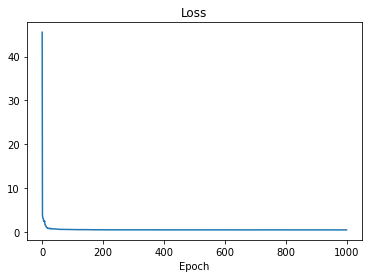

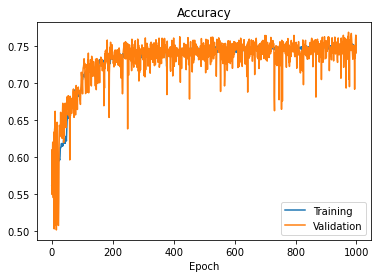

In [118]:
#print(history.history)

plt.clf()
plt.plot(history.history['loss'])
plt.title('Loss')
plt.xlabel('Epoch')
plt.show()

plt.clf()
plt.plot(history.history['accuracy'], label = 'Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [121]:
# Make predictions for a different observation
cas_A = pd.read_csv(file_dir+'science_dataframe_1505.csv').dropna()
print(cas_A)

Xs = np.array(cas_A[feature_list].values)

predict_cas_A = model.predict(Xs)

         Unnamed: 0          time  crsv  crsu  amp_sf  av1   av2  av3  au1  \
0                 0  6.196317e+07    31    33       1  102   501   46   42   
1                 1  6.196317e+07    22    27       1   50   433   81   42   
2                 2  6.196318e+07    47    13       1  204   612   57  288   
3                 3  6.196318e+07    40    33       1  193   852   75  422   
4                 4  6.196318e+07     2    21       1  394   542   22   55   
...             ...           ...   ...   ...     ...  ...   ...  ...  ...   
6951805     6951805  6.201342e+07    29    31       1  314  1147   70  192   
6951806     6951806  6.201342e+07    16    57       1  192   409   28   90   
6951807     6951807  6.201342e+07    28    30       1  264  1744  148  492   
6951808     6951808  6.201342e+07    57    56       1  325   487  217   89   
6951809     6951809  6.201342e+07    32    20       1  290   416   29  265   

          au2  ...  PI exceeding 255  Event time tag is out of 

~~~~~~~~Length of background =  5028090
~~~~~~~~Length of sources =  1872413


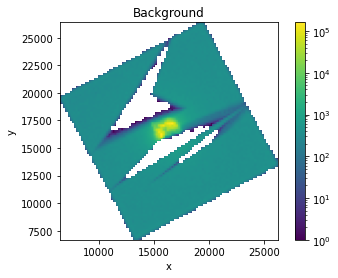

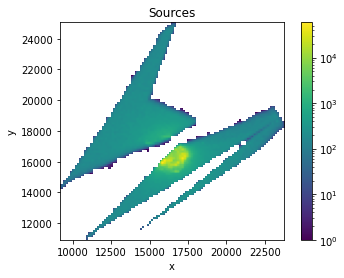

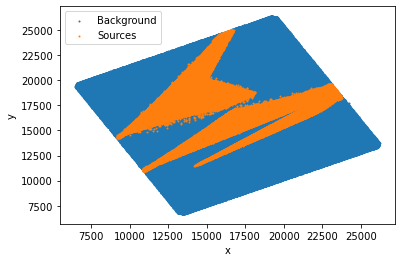

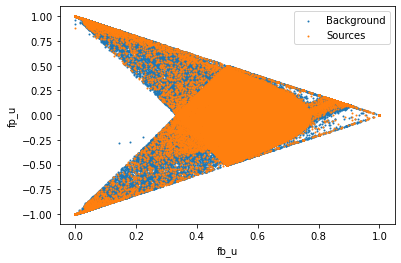

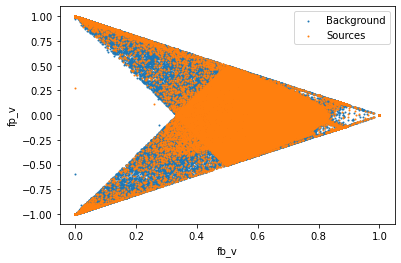

KeyboardInterrupt: 

In [131]:
cas_A['prediction'] = predict_cas_A


df1 = cas_A[cas_A['prediction'] > 0.5]
df2 = cas_A[cas_A['prediction'] < 0.5]

compare_in_parameter_space(param_list, df1, df2)

In [ ]:
# Make predictions on the entire dataset

In [3]:
# This is the good ol bagging method, the random forest is probably more relevant here
nbins=300
rad=100000
predictor_list_in = ['fb_u','fp_u','fb_v','fp_v','pha','sumamps']
predictor_list_in_RFR = ['fb_u','fp_u','fb_v','fp_v','pha','sumamps','random']

n_est = 100
max_samp = 'balance'
len_feat = len(predictor_list_in)

# n_estimators, max_samples, len_features = bagging_hyperaparameters

#['1505','144','9219','591','20741','1483']

predictor_list_in = ['fb_u','fp_u','fb_v','fp_v','pha','sumamps']
predictor_list_in_RFR = ['fb_u','fp_u','fb_v','fp_v','pha','sumamps','random']
len_feat = len(predictor_list_in)

csv_path = "/Users/beckynevin/CfA_Code/EVE/data/csv_files/"

preds_sci_RFR, preds_bg_RFR, pred_sci_bag, pred_bg_bag, sci_set, bg_set = classify_cutout_stars(csv_path,'579','1505',#train, test 
                                                                             rad, nbins,#use 1000 for Cas A
                                                                             int(4e5),#subsample size
                                                                            int(4e3),# number of positives ie background
                                                                             0.5,
                                                                            [n_est, max_samp, len_feat],
                                                                            predictor_list_in,
                                                                            predictor_list_in_RFR,
                                                                                True, #plot_data
                                                                                False,#run_hyperbola
                                                                                False,#run_forest
                                                                                False,#balanced
                                                                                False,
                                                                                adjust_th = True)

# order is sci, bg train, sci, bg test

/Users/beckynevin/anaconda3/envs/ciao-4.12/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


ValueError: Cannot take a larger sample than population when 'replace=False'

In [4]:
# Start working on writing a neural network (supervised)